In [1]:
!wget https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task1-2_Training_Input.zip

--2022-02-10 16:27:30--  https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task1-2_Training_Input.zip
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 52.216.18.224
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|52.216.18.224|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11165358566 (10G) [application/zip]
Saving to: ‘ISIC2018_Task1-2_Training_Input.zip’

ISIC2018_Task1-2_Tr 100%[===================>]  10.40G  42.3MB/s    in 3m 52s  

2022-02-10 16:31:22 (45.9 MB/s) - ‘ISIC2018_Task1-2_Training_Input.zip’ saved [11165358566/11165358566]



In [2]:
!unzip /content/ISIC2018_Task1-2_Training_Input.zip

Archive:  /content/ISIC2018_Task1-2_Training_Input.zip
   creating: ISIC2018_Task1-2_Training_Input/
  inflating: ISIC2018_Task1-2_Training_Input/ATTRIBUTION.txt  
  inflating: ISIC2018_Task1-2_Training_Input/ISIC_0000000.jpg  
  inflating: ISIC2018_Task1-2_Training_Input/ISIC_0000001.jpg  
  inflating: ISIC2018_Task1-2_Training_Input/ISIC_0000003.jpg  
  inflating: ISIC2018_Task1-2_Training_Input/ISIC_0000004.jpg  
  inflating: ISIC2018_Task1-2_Training_Input/ISIC_0000006.jpg  
  inflating: ISIC2018_Task1-2_Training_Input/ISIC_0000007.jpg  
  inflating: ISIC2018_Task1-2_Training_Input/ISIC_0000008.jpg  
  inflating: ISIC2018_Task1-2_Training_Input/ISIC_0000009.jpg  
  inflating: ISIC2018_Task1-2_Training_Input/ISIC_0000011.jpg  
  inflating: ISIC2018_Task1-2_Training_Input/ISIC_0000012.jpg  
  inflating: ISIC2018_Task1-2_Training_Input/ISIC_0000013.jpg  
  inflating: ISIC2018_Task1-2_Training_Input/ISIC_0000014.jpg  
  inflating: ISIC2018_Task1-2_Training_Input/ISIC_0000015.jpg  
  in

In [3]:
!wget https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task1_Training_GroundTruth.zip

--2022-02-10 16:33:32--  https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task1_Training_GroundTruth.zip
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 54.231.138.129
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|54.231.138.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27402895 (26M) [application/zip]
Saving to: ‘ISIC2018_Task1_Training_GroundTruth.zip’

ISIC2018_Task1_Trai 100%[===================>]  26.13M  50.7MB/s    in 0.5s    

2022-02-10 16:33:33 (50.7 MB/s) - ‘ISIC2018_Task1_Training_GroundTruth.zip’ saved [27402895/27402895]



In [4]:
!unzip /content/ISIC2018_Task1_Training_GroundTruth.zip

Archive:  /content/ISIC2018_Task1_Training_GroundTruth.zip
   creating: ISIC2018_Task1_Training_GroundTruth/
  inflating: ISIC2018_Task1_Training_GroundTruth/ATTRIBUTION.txt  
  inflating: ISIC2018_Task1_Training_GroundTruth/ISIC_0000000_segmentation.png  
  inflating: ISIC2018_Task1_Training_GroundTruth/ISIC_0000001_segmentation.png  
  inflating: ISIC2018_Task1_Training_GroundTruth/ISIC_0000003_segmentation.png  
  inflating: ISIC2018_Task1_Training_GroundTruth/ISIC_0000004_segmentation.png  
  inflating: ISIC2018_Task1_Training_GroundTruth/ISIC_0000006_segmentation.png  
  inflating: ISIC2018_Task1_Training_GroundTruth/ISIC_0000007_segmentation.png  
  inflating: ISIC2018_Task1_Training_GroundTruth/ISIC_0000008_segmentation.png  
  inflating: ISIC2018_Task1_Training_GroundTruth/ISIC_0000009_segmentation.png  
  inflating: ISIC2018_Task1_Training_GroundTruth/ISIC_0000011_segmentation.png  
  inflating: ISIC2018_Task1_Training_GroundTruth/ISIC_0000012_segmentation.png  
  inflating: I

In [5]:
import os
import sys
import random

import numpy as np
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [6]:
seed = 2019
random.seed = seed
np.random.seed = seed
tf.seed = seed

In [7]:
class DataGen(keras.utils.Sequence):
    def __init__(self, ids, path, batch_size=8, image_size=128):
        self.ids = ids
        self.path = path
        self.batch_size = batch_size
        self.image_size = image_size
        self.on_epoch_end()
        
    def __load__(self, id_name):
        ## Path
        image_path = os.path.join(self.path, "ISIC2018_Task1-2_Training_Input", id_name) + ".jpg"
        mask_path = os.path.join(self.path, "ISIC2018_Task1_Training_GroundTruth", id_name) + "_segmentation.png"
        
        ## Reading Image
    
        image = cv2.imread(image_path,1)
        image = cv2.resize(image, (self.image_size, self.image_size))
        mask = np.zeros((self.image_size, self.image_size, 1))
        _mask = cv2.imread(mask_path, -1)
        _mask = cv2.resize(_mask, (self.image_size, self.image_size))
        _mask = np.expand_dims(_mask, axis=-1)
        mask = np.maximum(mask, _mask)
        
        
        ## Normalizaing 
        image = image/255.0
        mask = mask/255.0
        
        return image, mask
    
    def __getitem__(self, index):
        if(index+1)*self.batch_size > len(self.ids):
            self.batch_size = len(self.ids) - index*self.batch_size
        
        files_batch = self.ids[index*self.batch_size : (index+1)*self.batch_size]
        
        image = []
        mask  = []
        
        for id_name in files_batch:
            _img, _mask = self.__load__(id_name)
            image.append(_img)
            mask.append(_mask)
            
        image = np.array(image)
        mask  = np.array(mask)
        
        return image, mask
    
    def on_epoch_end(self):
        pass
    
    def __len__(self):
        return int(np.ceil(len(self.ids)/float(self.batch_size)))

In [8]:
image_size = 128
path = "./"
train_path = "./ISIC2018_Task1-2_Training_Input"
epochs = 1
batch_size = 19

## Training Ids
train_ids = []
for files in os.walk(train_path):
   for name in files:
      train_ids.append(name)

train_ids = train_ids[2]
train_ids = [i.split('.', 1)[0] for i in train_ids]
val_data_size = 171

valid_ids = train_ids[:val_data_size]
train_ids = train_ids[val_data_size:]

In [9]:
gen = DataGen(train_ids, path, batch_size=batch_size, image_size=image_size)
x, y = gen.__getitem__(0)
print(x.shape, y.shape)

(19, 128, 128, 3) (19, 128, 128, 1)


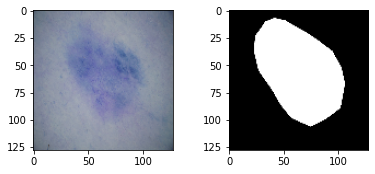

In [10]:
r = random.randint(0, len(x)-1)

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(1, 2, 1)
ax.imshow(x[r])
ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.reshape(y[r], (image_size, image_size)), cmap="gray")

In [11]:
def down_block(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    p = keras.layers.MaxPool2D((2, 2), (2, 2))(c)
    return c, p

def up_block(x, skip, filters, kernel_size=(3, 3), padding="same", strides=1):
    us = keras.layers.UpSampling2D((2, 2))(x)
    concat = keras.layers.Concatenate()([us, skip])
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(concat)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

def bottleneck(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

In [12]:
def UNet():
    f = [16, 32, 64, 128, 256]
    inputs = keras.layers.Input((image_size, image_size, 3))
    
    p0 = inputs
    c1, p1 = down_block(p0, f[0]) 
    c2, p2 = down_block(p1, f[1]) 
    c3, p3 = down_block(p2, f[2])
    c4, p4 = down_block(p3, f[3]) 
    
    bn = bottleneck(p4, f[4])
    
    u1 = up_block(bn, c4, f[3]) #8 -> 16
    u2 = up_block(u1, c3, f[2]) #16 -> 32
    u3 = up_block(u2, c2, f[1]) #32 -> 64
    u4 = up_block(u3, c1, f[0]) #64 -> 128
    
    outputs = keras.layers.Conv2D(1, (1, 1), padding="same", activation="sigmoid")(u4)
    model = keras.models.Model(inputs, outputs)
    return model

In [13]:
model = UNet()
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])

In [14]:
train_gen = DataGen(train_ids, path)
valid_gen = DataGen(valid_ids, path)

train_steps = len(train_ids)//batch_size
valid_steps = len(valid_ids)//batch_size
model.fit_generator(train_gen, validation_data=valid_gen, steps_per_epoch=train_steps, validation_steps=valid_steps, epochs = epochs)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


127/127 [==============================] - ETA: 0s - loss: 0.4121 - acc: 0.8127

UnknownError: ignored

In [ ]:
## Save the Weights
model.save_weights("UNetW.h5")

In [ ]:
for i in range(0,20):
    x, y = valid_gen.__getitem__(i)
    result = model.predict(x)
    
    result = result > 0.5
    fig = plt.figure(figsize = (16,8))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    
    ax = fig.add_subplot(1, 3, 1)
    ax.imshow(x[0])
    ax = fig.add_subplot(1, 3, 2)
    ax.imshow(np.reshape(y[0]*255, (image_size, image_size)), cmap="gray")

    ax = fig.add_subplot(1, 3, 3)
    ax.imshow(np.reshape(result[0]*255, (image_size, image_size)), cmap="gray")